# Imports

In [66]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Tomás\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Read CSV

In [68]:
df = pd.read_csv('stats.csv', delimiter=';')
print(df.columns.tolist())

['Uses Octree', 'Spheres', 'Max Octree Depth', 'Num Samples', 'Max Rays Depth', 'Screen Width', 'Screen Height', 'Min', 'Max', 'Avg', 'Min FPS', 'Max FPS', 'Avg FPS']


In [69]:
# prep columns in df
df['Uses Octree'] = df['Uses Octree'].astype(int) 
df['Spheres'] = df['Spheres'].astype(int) 
df['Max Octree Depth'] = df['Max Octree Depth'].astype(int)
df['Num Samples'] = df['Num Samples'].astype(int)
df['Max Rays Depth'] = df['Max Rays Depth'].astype(int)
df['Screen Width'] = df['Screen Width'].astype(int)
df['Screen Height'] = df['Screen Height'].astype(int)
df['Min'] = df['Min'].astype(float)
df['Max'] = df['Max'].astype(float)
df['Avg'] = df['Avg'].astype(float)
df['Min FPS'] = df['Min FPS'].astype(float)
df['Max FPS'] = df['Max FPS'].astype(float)
df['Avg FPS'] = df['Avg FPS'].astype(float)

In [70]:
df_octree = df[df['Uses Octree'] == 1]
df_no_octree = df[df['Uses Octree'] == 0]
print(df_octree)

     Uses Octree  Spheres  Max Octree Depth  Num Samples  Max Rays Depth  \
30             1       10                 1            4               4   
31             1       10                 5            4               4   
32             1       10                10            4               4   
33             1       10                 1            4               4   
34             1       10                 5            4               4   
..           ...      ...               ...          ...             ...   
115            1     1000                 5           32              16   
116            1     1000                10           32              16   
117            1     1000                 1           32              16   
118            1     1000                 5           32              16   
119            1     1000                10           32              16   

     Screen Width  Screen Height       Min       Max       Avg    Min FPS  \
30        

Correlation between variables and metrics:
                       Min       Max       Avg   Min FPS   Max FPS   Avg FPS
Spheres           0.551107  0.542596  0.545337 -0.630682 -0.635526 -0.646841
Max Octree Depth -0.008857 -0.002048 -0.005984 -0.085436 -0.062218 -0.071535
Num Samples       0.404620  0.405952  0.404862 -0.340218 -0.364143 -0.348119
Max Rays Depth    0.401341  0.402967  0.401616 -0.324954 -0.343793 -0.330884
Screen Height     0.332468  0.347483  0.339946 -0.205034 -0.192793 -0.195069


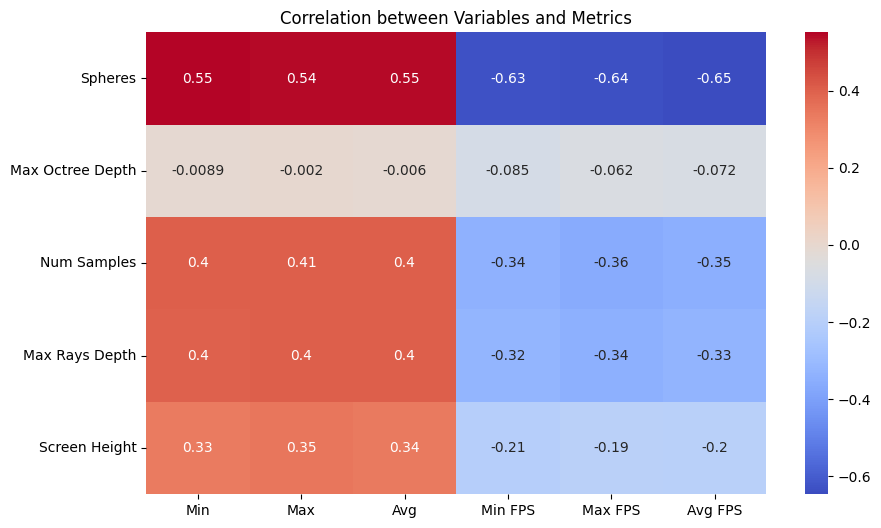

In [71]:

# Calculate the correlation matrix between the 6 variables and the 6 metrics
variables = ['Spheres', 'Max Octree Depth', 'Num Samples', 'Max Rays Depth', 'Screen Height']
metrics = ['Min', 'Max', 'Avg', 'Min FPS', 'Max FPS', 'Avg FPS']

correlation = df_octree[variables + metrics].corr().loc[variables, metrics]
print("Correlation between variables and metrics:")
print(correlation)

# Visualize the correlation matrix as a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Variables and Metrics')
plt.show()

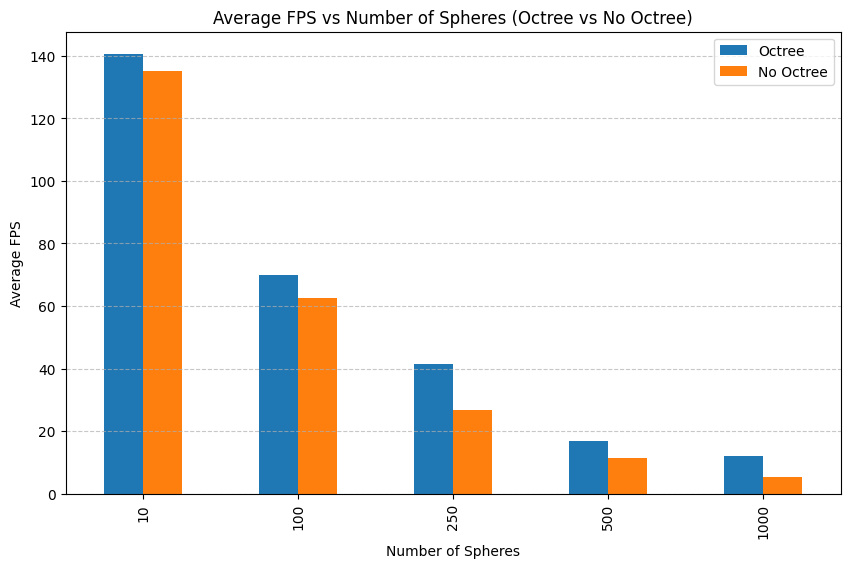

In [72]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree': df_octree.groupby('Spheres')['Avg FPS'].mean(),
    'No Octree': df_no_octree.groupby('Spheres')['Avg FPS'].mean()
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres (Octree vs No Octree)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [73]:
import numpy as np
# Create a new DataFrame with the avg FPS for octree and no-octree
df_octree = df[df['Uses Octree'] == 1]
df_no_octree = df[df['Uses Octree'] == 0]
df_octree_4 = df_octree[df_octree['Num Samples'] == 4]
df_no_octree_4 = df_no_octree[df_no_octree['Num Samples'] == 4]
df_octree_low = df_octree_4[df_octree_4['Max Rays Depth'] == 4]
df_no_octree_low = df_no_octree_4[df_no_octree_4['Max Rays Depth'] == 4]
df_octree_16 = df_octree[df_octree['Num Samples'] == 16]
df_no_octree_16 = df_no_octree[df_no_octree['Num Samples'] == 16]
df_octree_medium = df_octree_16[df_octree_16['Max Rays Depth'] == 8]
df_no_octree_medium = df_no_octree_16[df_no_octree_16['Max Rays Depth'] == 8]
df_octree_32 = df_octree[df_octree['Num Samples'] == 32]
df_no_octree_32 = df_no_octree[df_no_octree['Num Samples'] == 32]
df_octree_high = df_octree_32[df_octree_32['Max Rays Depth'] == 16]
df_no_octree_high = df_no_octree_32[df_no_octree_32['Max Rays Depth'] == 16]

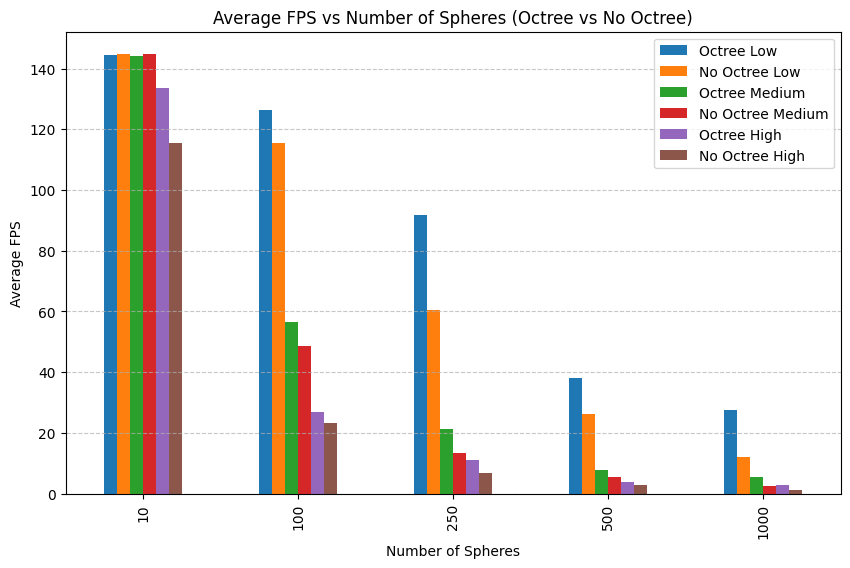

In [74]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree Low': df_octree_low.groupby('Spheres')['Avg FPS'].mean(),
    'No Octree Low': df_no_octree_low.groupby('Spheres')['Avg FPS'].mean(),
    'Octree Medium': df_octree_medium.groupby('Spheres')['Avg FPS'].mean(),
    'No Octree Medium': df_no_octree_medium.groupby('Spheres')['Avg FPS'].mean(),
    'Octree High': df_octree_high.groupby('Spheres')['Avg FPS'].mean(),
    'No Octree High': df_no_octree_high.groupby('Spheres')['Avg FPS'].mean(),
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres (Octree vs No Octree)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

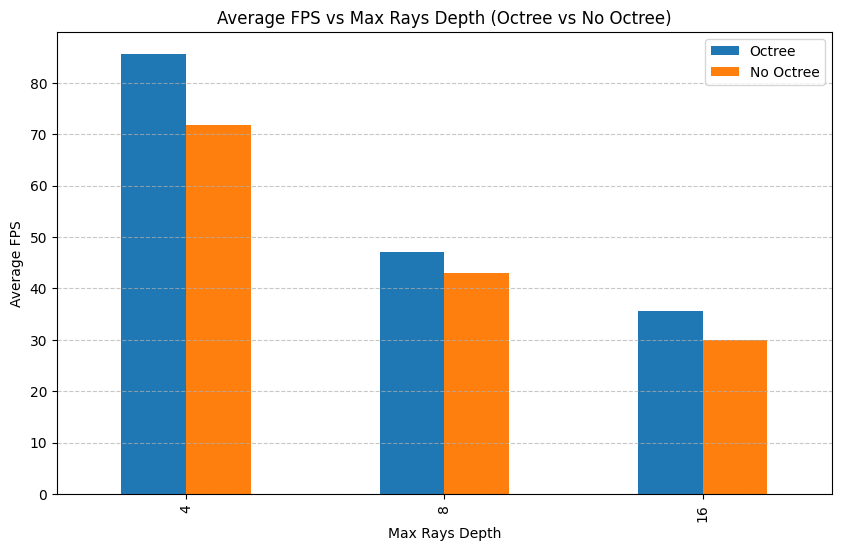

In [75]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree': df_octree.groupby('Max Rays Depth')['Avg FPS'].mean(),
    'No Octree': df_no_octree.groupby('Max Rays Depth')['Avg FPS'].mean()
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Max Rays Depth')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Max Rays Depth (Octree vs No Octree)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

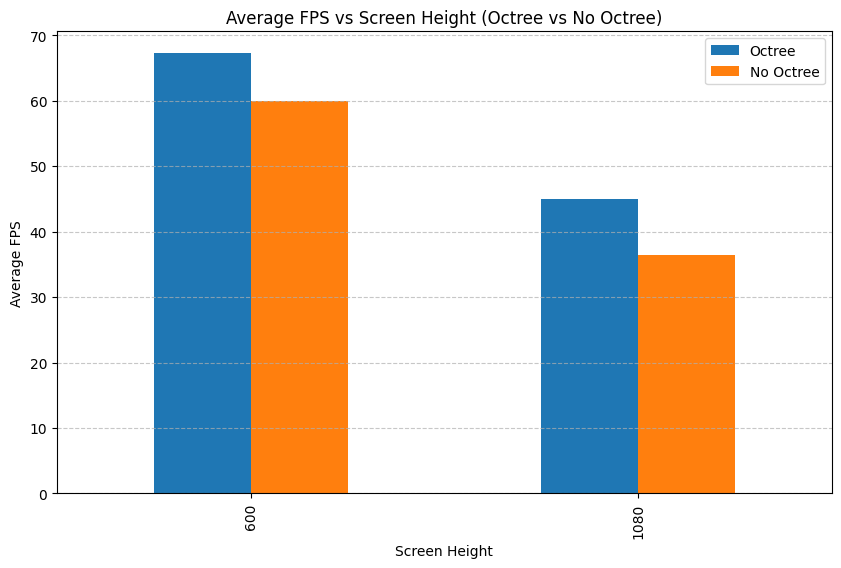

In [76]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree': df_octree.groupby('Screen Height')['Avg FPS'].mean(),
    'No Octree': df_no_octree.groupby('Screen Height')['Avg FPS'].mean()
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Screen Height')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Screen Height (Octree vs No Octree)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

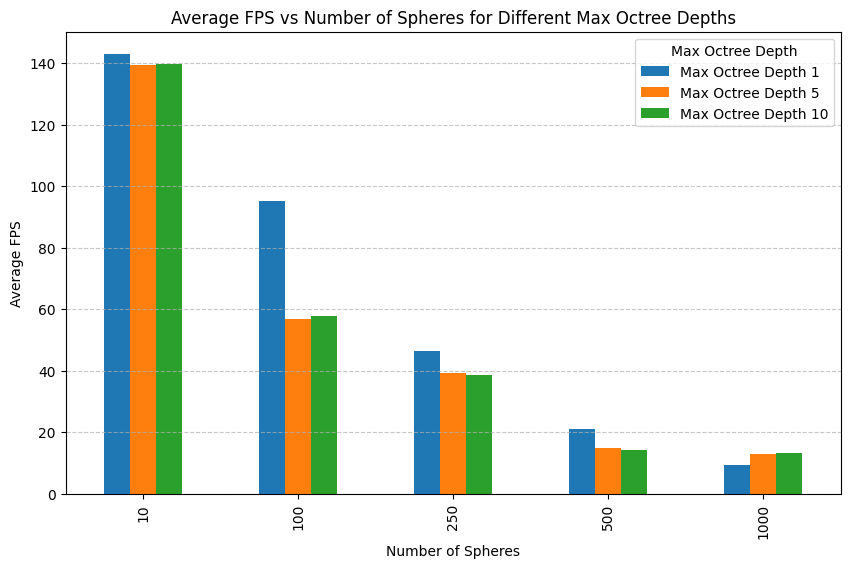

In [77]:
octree_1 = df_octree[df_octree['Max Octree Depth'] == 1]
octree_5 = df_octree[df_octree['Max Octree Depth'] == 5]
octree_10 = df_octree[df_octree['Max Octree Depth'] == 10]


octree_depths = [1, 5, 10]
avg_fps = [octree_1[octree_1['Spheres'] == spheres]['Avg FPS'].mean() for spheres in df_octree['Spheres'].unique()]
avg_fps_5 = [octree_5[octree_5['Spheres'] == spheres]['Avg FPS'].mean() for spheres in df_octree['Spheres'].unique()]
avg_fps_10 = [octree_10[octree_10['Spheres'] == spheres]['Avg FPS'].mean() for spheres in df_octree['Spheres'].unique()]
avg_fps_data = pd.DataFrame({
    'Spheres': df_octree['Spheres'].unique(),
    'Max Octree Depth 1': avg_fps,
    'Max Octree Depth 5': avg_fps_5,
    'Max Octree Depth 10': avg_fps_10
})
avg_fps_data.set_index('Spheres').plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres for Different Max Octree Depths')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Max Octree Depth')
plt.show()


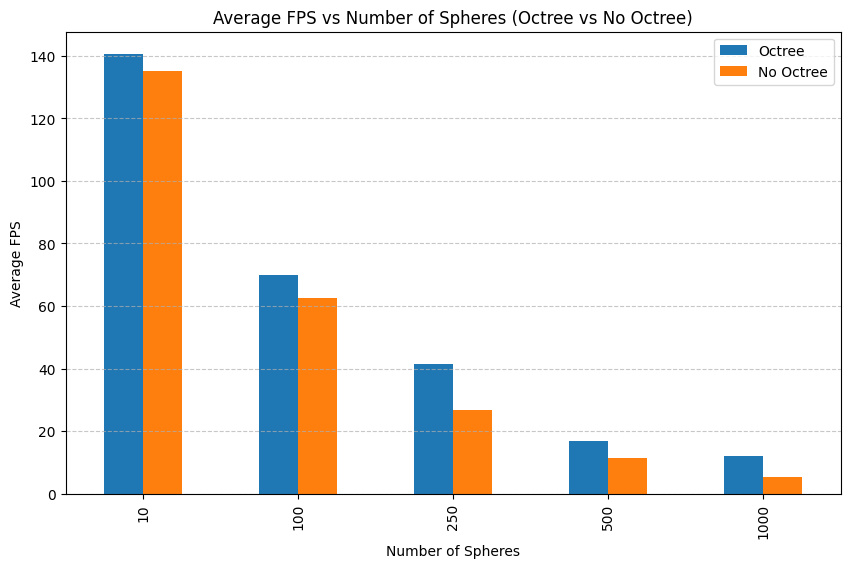

In [78]:
# Create a new DataFrame with the avg FPS for octree and no-octree
comparison_df = pd.DataFrame({
    'Octree': df_octree.groupby('Spheres')['Avg FPS'].mean(),
    'No Octree': df_no_octree.groupby('Spheres')['Avg FPS'].mean()
})

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average FPS vs Number of Spheres (Octree vs No Octree)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [79]:
print(df_octree['Max Octree Depth'].unique())
print(df_octree['Num Samples'].unique())
print(df_octree['Max Rays Depth'].unique())
print(df_octree['Screen Height'].unique())
no_octree = df_no_octree[df_no_octree['Max Octree Depth'] == -1]
no_octree_4 = no_octree[no_octree['Num Samples'] == 4]
no_octree_4_4 = no_octree_4[no_octree_4['Max Rays Depth'] == 4]
no_octree_4_4_600 = no_octree_4_4[no_octree_4_4['Screen Height'] == 600]
no_octree_4_4_1080 = no_octree_4_4[no_octree_4_4['Screen Height'] == 1080]

octree_1 = df_octree[df_octree['Max Octree Depth'] == 1]
octree_1_4 = octree_1[octree_1['Num Samples'] == 4]
octree_1_4_4 = octree_1_4[octree_1_4['Max Rays Depth'] == 4]
octree_1_4_4_600 = octree_1_4_4[octree_1_4_4['Screen Height'] == 600]

octree_1_4_4_1080 = octree_1_4_4[octree_1_4_4['Screen Height'] == 1080]


[ 1  5 10]
[ 4 16 32]
[ 4  8 16]
[ 600 1080]


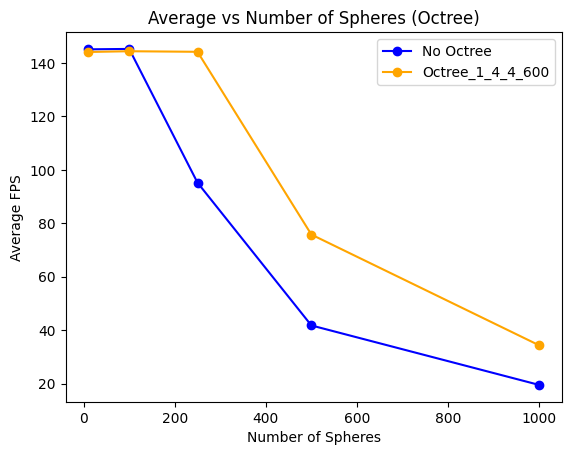

In [80]:
avg_by_spheres = no_octree_4_4_600.groupby('Spheres')['Avg FPS'].mean().reset_index()
avg_by_spheres_octree_1_4_4_600 = octree_1_4_4_600.groupby('Spheres')['Avg FPS'].mean().reset_index()
plt.plot(avg_by_spheres['Spheres'], avg_by_spheres['Avg FPS'], marker='o', label='No Octree', color='blue')
plt.plot(avg_by_spheres_octree_1_4_4_600['Spheres'], avg_by_spheres_octree_1_4_4_600['Avg FPS'], marker='o', label='Octree_1_4_4_600', color='orange')

plt.xlabel('Number of Spheres')
plt.ylabel('Average FPS')
plt.title('Average vs Number of Spheres (Octree)')
plt.legend()
plt.show()

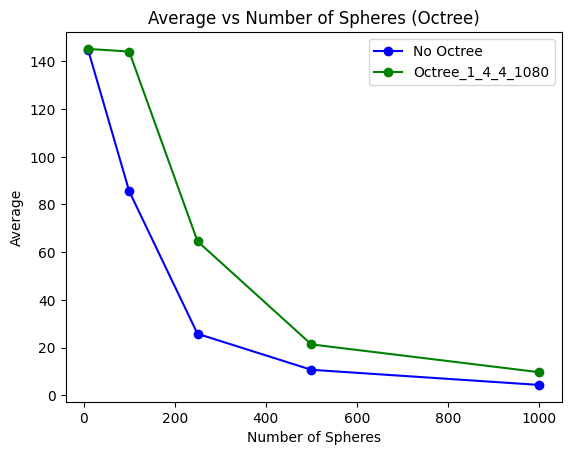

In [81]:
avg_by_spheres = no_octree_4_4_1080.groupby('Spheres')['Avg FPS'].mean().reset_index()
avg_by_spheres_octree_1_4_4_1080 = octree_1_4_4_1080.groupby('Spheres')['Avg FPS'].mean().reset_index()

plt.plot(avg_by_spheres['Spheres'], avg_by_spheres['Avg FPS'], marker='o', label='No Octree', color='blue')
plt.plot(avg_by_spheres_octree_1_4_4_1080['Spheres'], avg_by_spheres_octree_1_4_4_1080['Avg FPS'], marker='o', label='Octree_1_4_4_1080', color='green')

plt.xlabel('Number of Spheres')
plt.ylabel('Average')
plt.title('Average vs Number of Spheres (Octree)')
plt.legend()
plt.show()


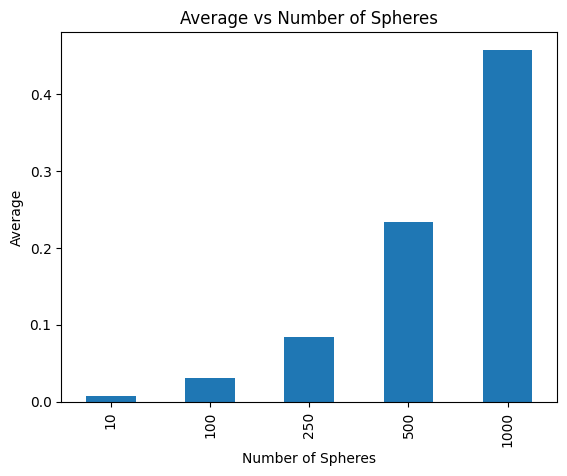

In [82]:
df.groupby('Spheres')['Avg'].mean().plot(kind='bar')
plt.xlabel('Number of Spheres')
plt.ylabel('Average')
plt.title('Average vs Number of Spheres')
plt.show()